In [1]:
import time

import pandas as pd
import tensorflow as tf

import utils

# Dataset

In [2]:
case_1 = pd.read_csv("./datasets/case_1.csv", index_col='Time')
case_2 = pd.read_csv("./datasets/case_2.csv", index_col='Time')
case_3 = pd.read_csv("./datasets/case_3.csv", index_col='Time')
case_4 = pd.read_csv("./datasets/case_4.csv", index_col='Time')
case_5 = pd.read_csv("./datasets/case_5.csv", index_col='Time')

In [3]:
outlets = [ col for col in case_1.columns.values if col.startswith('outlet') ]
label_columns = outlets[1:]
num_features = case_1.shape[1]

In [4]:
column_indices = { name: i for i, name in enumerate(case_1.columns) }

In [5]:
PLOT_COL = "outlet_65"

# Model Creation

In [6]:
IN_WIDTH = 18
OUT_STEPS = 18
MAX_EPOCHS = 15
BATCH_SIZE = 32
features_size = len(label_columns)

In [7]:
print(f"Using {IN_WIDTH*5}s of data to predict {OUT_STEPS*5}s.")
print(f"Using {IN_WIDTH*5//60}min {IN_WIDTH*5 % 60}s of data to predict {OUT_STEPS*5//60}min {IN_WIDTH*5 % 60}s into de future.")

Using 90s of data to predict 90s.
Using 1min 30s of data to predict 1min 30s into de future.


In [8]:
CONV_WIDTH = 3 # default 3
multi_conv_model = tf.keras.Sequential([
    # Shape [batch, time, features] => [batch, CONV_WIDTH, features]
    tf.keras.layers.Lambda(lambda x: x[:, -CONV_WIDTH:, :]),
    # Shape => [batch, 1, conv_units]
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv1D(256, activation='relu', kernel_size=(CONV_WIDTH)),
    # Shape => [batch, 1,  out_steps*features]
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(OUT_STEPS*features_size,
                          kernel_initializer=tf.initializers.zeros()),
    # Shape => [batch, out_steps, features]
    tf.keras.layers.Reshape([OUT_STEPS, features_size])
])

multi_conv_model.compile(loss=tf.losses.MeanSquaredError(),
                         optimizer=tf.optimizers.Adam(),
                         metrics=[tf.metrics.RootMeanSquaredError()])

# history = compile_and_fit(multi_conv_model, multi_window)

# IPython.display.clear_output()

# multi_val_performance['Conv'] = multi_conv_model.evaluate(multi_window.val)
# multi_performance['Conv'] = multi_conv_model.evaluate(multi_window.test, verbose=0)
# multi_window.plot(multi_conv_model)

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-10-20 19:51:11.508883: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-10-20 19:51:11.508989: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [9]:
exec_times = {}

In [10]:
results = {}

## Case 2

In [11]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_2,
    model=multi_conv_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE
)
exec_times['case_2'] = time.time() - start_t

2022-10-20 19:51:12.033190: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-10-20 19:51:12.419036: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-20 19:51:13.021772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


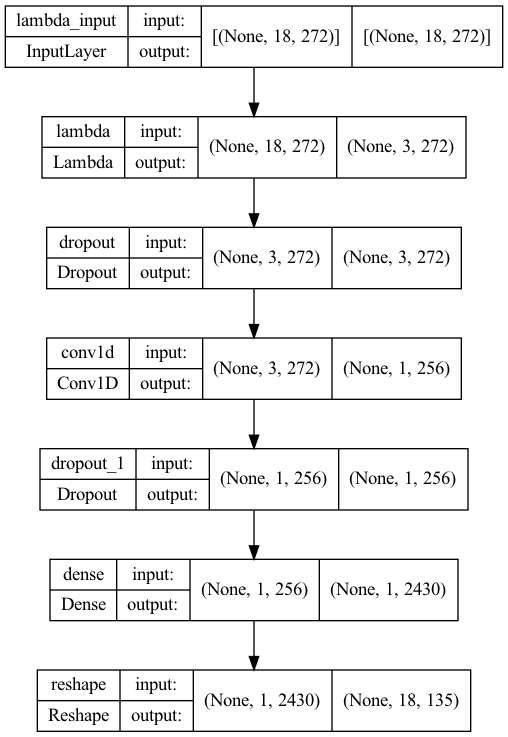

In [12]:
tf.keras.utils.plot_model(multi_conv_model, "./plots/models/multi_conv_model.png", show_shapes=True)

label_col_index 64
label_col_index 64
label_col_index 64


2022-10-20 19:51:19.498763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


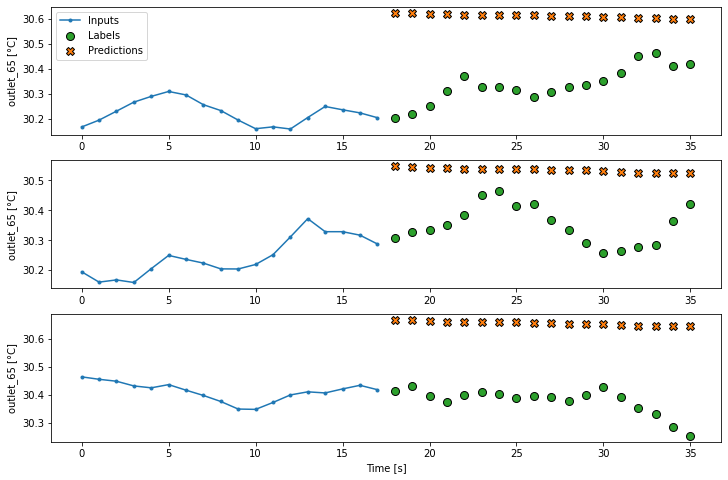

In [13]:
window.plot(multi_conv_model, plot_col=PLOT_COL)

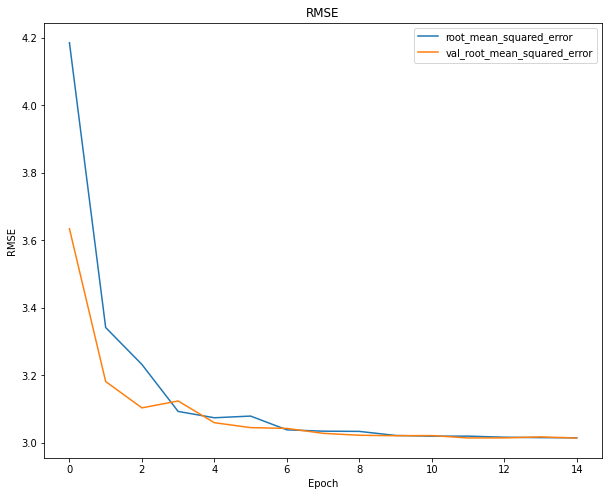

In [14]:
utils.plot_losses(history=history)

In [15]:
results['case_2'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 3

In [16]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_3,
    model=multi_conv_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE
)

exec_times['case_3'] = time.time() - start_t

label_col_index 64
label_col_index 64
label_col_index 64


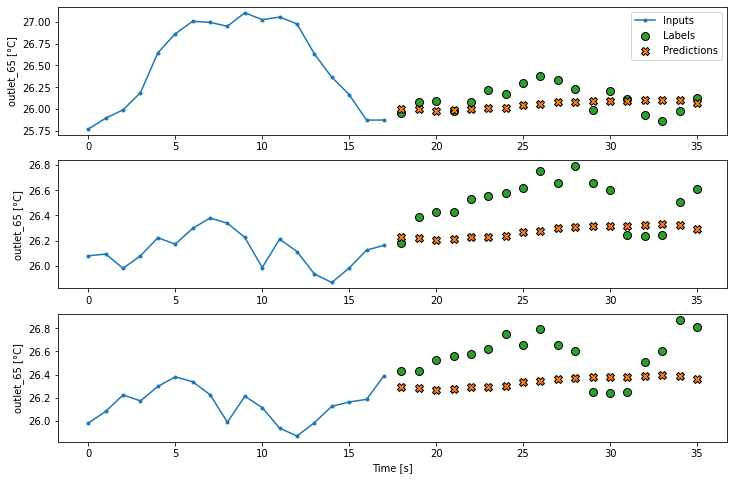

In [17]:
window.plot(multi_conv_model, plot_col=PLOT_COL)

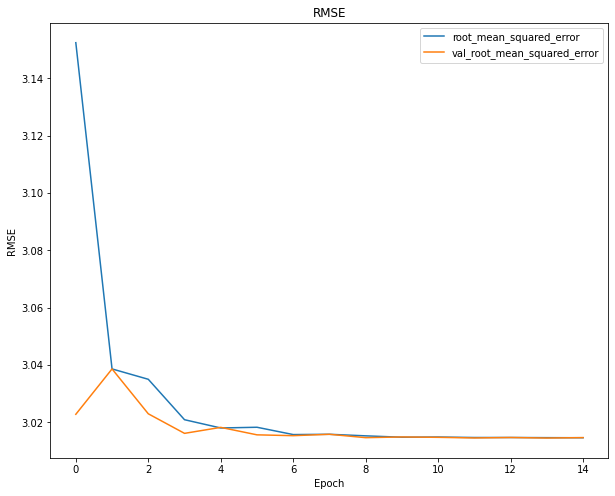

In [18]:
utils.plot_losses(history=history)

In [19]:
results['case_3'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 4

In [20]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_4,
    model=multi_conv_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE
)

exec_times['case_4'] = time.time() - start_t

label_col_index 64
label_col_index 64
label_col_index 64


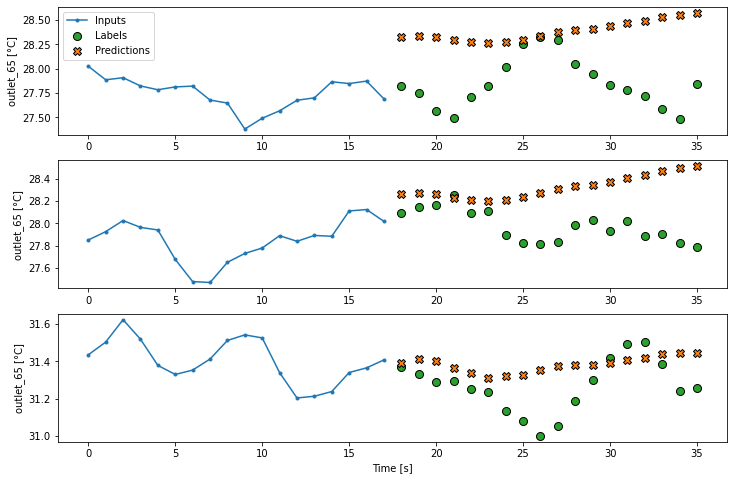

In [21]:
window.plot(multi_conv_model, plot_col=PLOT_COL)

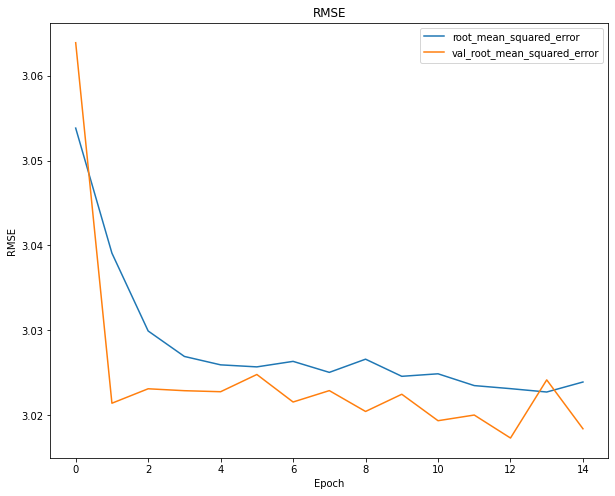

In [22]:
utils.plot_losses(history=history)

In [23]:
results['case_4'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 5

In [24]:
start_t = time.time()

window, history = utils.train_case(
    case_df=case_5,
    model=multi_conv_model,
    label_cols=label_columns,
    in_width=IN_WIDTH,
    out_steps=OUT_STEPS,
    max_epochs=MAX_EPOCHS,
    batch_size=BATCH_SIZE
)

exec_times['case_5'] = time.time() - start_t

label_col_index 64
label_col_index 64
label_col_index 64


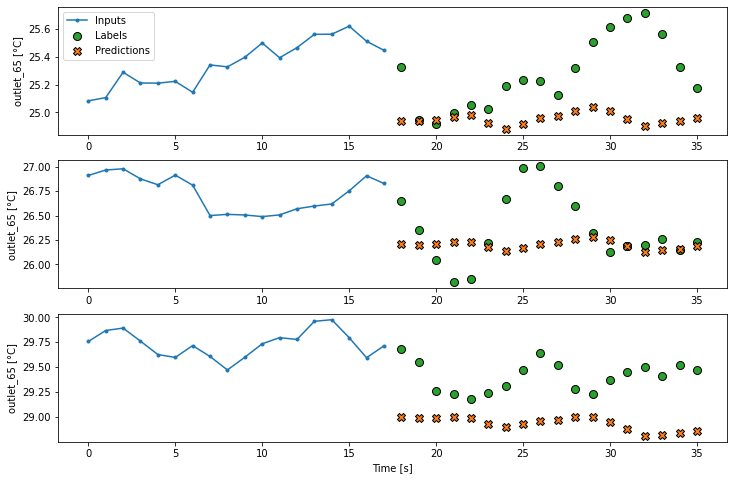

In [25]:
window.plot(multi_conv_model, plot_col=PLOT_COL)

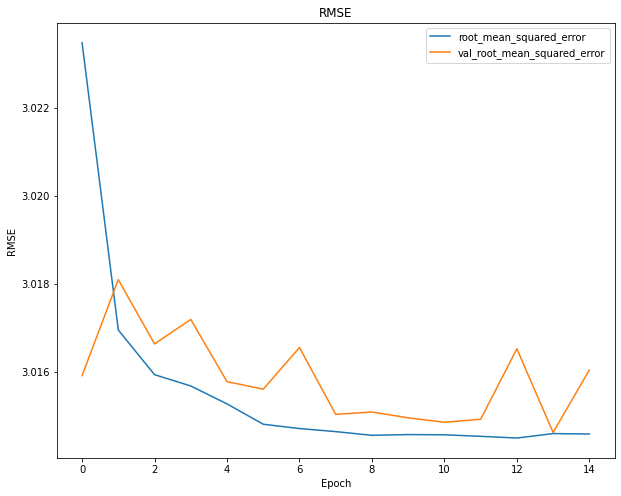

In [26]:
utils.plot_losses(history=history)

In [27]:
results['case_5'] = {
    'loss': history.history['loss'][-1],
    'rmse': history.history['root_mean_squared_error'][-1],
    'val_loss': history.history['val_loss'][-1],
    'val_rmse': history.history['val_root_mean_squared_error'][-1],
}

## Case 1 (Testing)

In [28]:
window = utils.WindowGenerator(
    train_df=case_1,
    input_width=IN_WIDTH,
    label_width=OUT_STEPS,
    shift=OUT_STEPS,
    label_columns=label_columns
)

test_res = multi_conv_model.evaluate(window.train) # testing

5/5 [==============================] - 0s 10ms/step - loss: 0.0144 - root_mean_squared_error: 0.1326


In [29]:
results['test'] = {
    'loss': utils.inverse_transform(test_res[0]),
    'rmse': utils.inverse_transform_rmse(test_res[1])
}

# Results

label_col_index 64
label_col_index 64
label_col_index 64


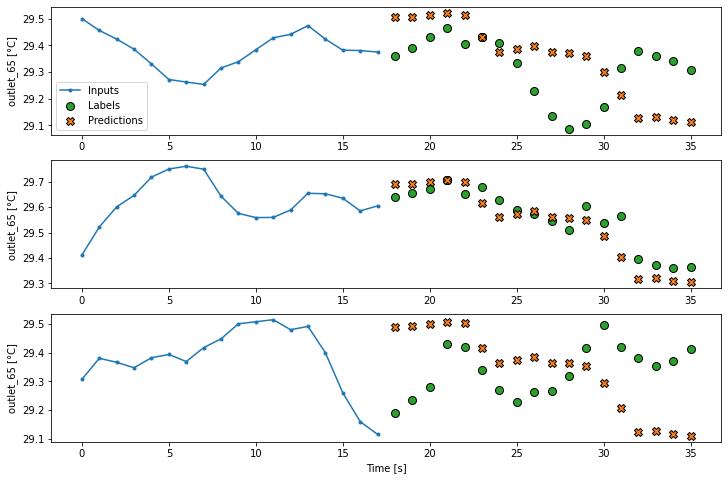

In [30]:
window.plot(
    multi_conv_model,
    plot_col=PLOT_COL,
    filename="./plots/predictions/multi_conv.jpg"
)

In [31]:
pd.DataFrame(results).transpose().round(2)

,loss,rmse,val_loss,val_rmse
case_2,9.09,3.02,9.09,3.01
case_3,9.09,3.01,9.09,3.01
case_4,9.13,3.02,9.11,3.02
case_5,9.09,3.01,9.09,3.02
test,9.43,3.08,NaN,NaN


In [32]:
exec_times_df = pd.DataFrame().from_dict(exec_times, orient='index', columns=['Time']).round(2)
exec_times_df

,Time
case_2,7.23
case_3,6.82
case_4,7.45
case_5,8.74


In [33]:
total_t = exec_times_df['Time'].sum()
print("Total training time: %dmin %.2fs" % (total_t//60, total_t % 60))

Total training time: 0min 30.24s


## Export model

In [34]:
multi_conv_model.save("./models/multi_conv")

2022-10-20 20:46:25.371598: W tensorflow/python/util/util.cc:368] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./models/multi_conv/assets
